## Computer Vision techniques to identify lanes and track them in real time videos as well as images 

We will use a combination of computer vision concepts and image processing tools to try and track lanes on a variety of roads

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# the test images we'll apply our CV tool to
test_img_dir = "test_images/"
original_image_names = os.listdir(test_img_dir)
original_image_names = list(map(lambda name: test_img_dir + name, original_image_names))
print(original_image_names)

['test_images/solidWhiteCurve.jpg', 'test_images/solidWhiteRight.jpg', 'test_images/solidYellowCurve.jpg', 'test_images/solidYellowLeft.jpg', 'test_images/video_challenge_0s.jpg', 'test_images/video_challenge_1s.jpg', 'test_images/video_challenge_2s.jpg', 'test_images/video_challenge_4s.jpg', 'test_images/video_challenge_5s.jpg', 'test_images/video_challenge_6s.jpg', 'test_images/video_yellow_lane_left_12s.jpg', 'test_images/video_yellow_lane_left_13s.jpg', 'test_images/video_yellow_lane_left_3s.jpg', 'test_images/whiteCarLaneSwitch.jpg']


In [12]:
def show_image_list(image_list, cols =2, fig_size = (15,15), labels = original_image_names, show_ticks = True):
    img_count = len(image_list)
    rows = img_count / cols
    cmap = None
    plt.figure(figsize=fig_size)
    for i in range(0, img_count):
        img_name = labels[i]
        
        plt.subplot(rows, cols, i+1)
        img = image_list[i]
        if (len(img.shape) < 3):
            cmap = "gray"
        if not show_ticks:
            plt.xticks([])
            plt.yticks([])
        
        plt.title(img_name[len(test_img_dir):])
        plt.imshow(img, cmap = cmap)
    plt.tight_layout()
    plt.show()

Total count: 14


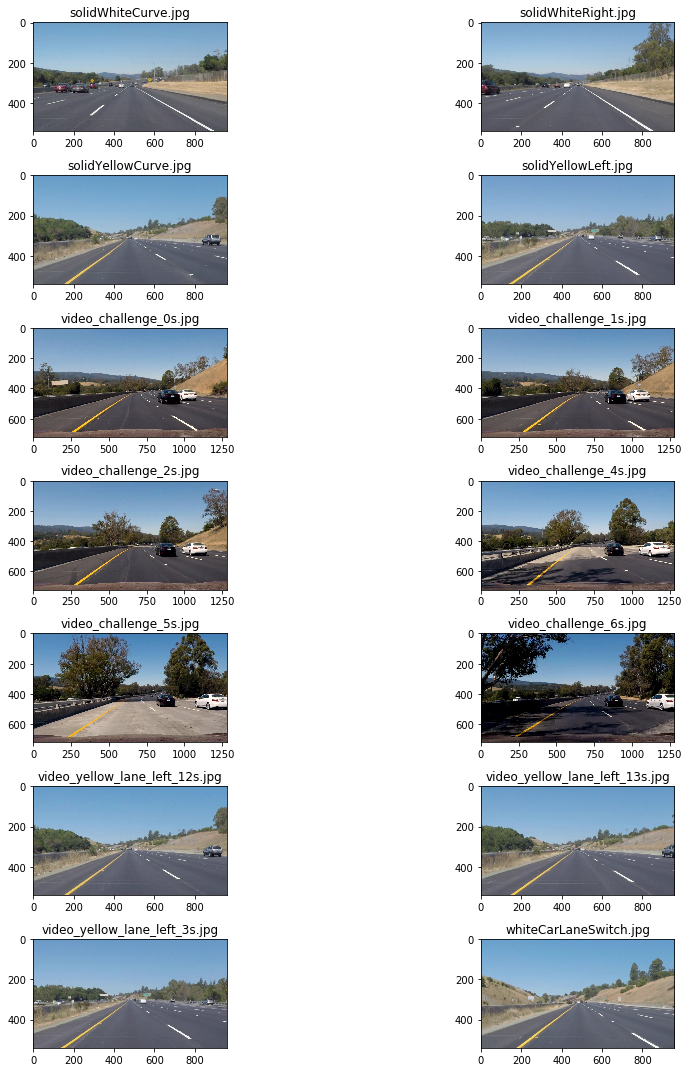

In [13]:
original_images = list(map(lambda img_name: mpimg.imread(img_name), original_image_names))
print("Total count:", len(original_images))
show_image_list(original_images)

In [14]:
print( "The shape of one image is:", original_images[0].shape)

The shape of one image is: (540, 960, 3)


# How exactly can we detect the lane lines in the images above?

1. Convert image to Hue, Saturation, Lightness channels (HSL)
2. Distinguish yellow and white from the HSL images
3. 